📂 Starting main.py...
📘 Episode 1/1000: Reward = -100.0, Steps = 1
📘 Episode 101/1000: Reward = -110.0, Steps = 11
📘 Episode 201/1000: Reward = -114.0, Steps = 15
📘 Episode 301/1000: Reward = -100.0, Steps = 1
📘 Episode 401/1000: Reward = 78.0, Steps = 23
📘 Episode 501/1000: Reward = 81.0, Steps = 20
📘 Episode 601/1000: Reward = -114.0, Steps = 15
📘 Episode 701/1000: Reward = 93.0, Steps = 8
📘 Episode 801/1000: Reward = 77.0, Steps = 24
📘 Episode 901/1000: Reward = 95.0, Steps = 6
📘 Episode 1000/1000: Reward = -113.0, Steps = 14

✅ Training Complete!
📊 Total Episodes: 1000
📈 Average Reward per Episode: -45.61
🏁 Final Episode Reward: -113.0

💾 Q-table saved to: d:\Projects\WayfinderBot\WayfinderBot\warehouserobot\q_values.npy

🚀 Path found from (13,9): [[13, 9], [12, 9], [11, 9], [11, 8], [11, 7], [10, 7], [9, 7], [9, 6], [9, 5], [8, 5], [7, 5], [6, 5], [5, 5], [5, 6], [5, 7], [5, 8], [5, 9], [4, 9], [3, 9], [2, 9], [1, 9], [1, 8], [1, 7], [1, 6], [1, 5], [0, 5]]
🧮 Total Accumulated Rew

C:\Users\chris\AppData\Local\Temp\ipykernel_21436\755504737.py:164: UserWarning: Glyph 129302 (\N{ROBOT FACE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\chris\AppData\Local\Temp\ipykernel_21436\755504737.py:164: UserWarning: Glyph 128681 (\N{TRIANGULAR FLAG ON POST}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
d:\Projects\WayfinderBot\WayfinderBot\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129302 (\N{ROBOT FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\Projects\WayfinderBot\WayfinderBot\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128681 (\N{TRIANGULAR FLAG ON POST}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


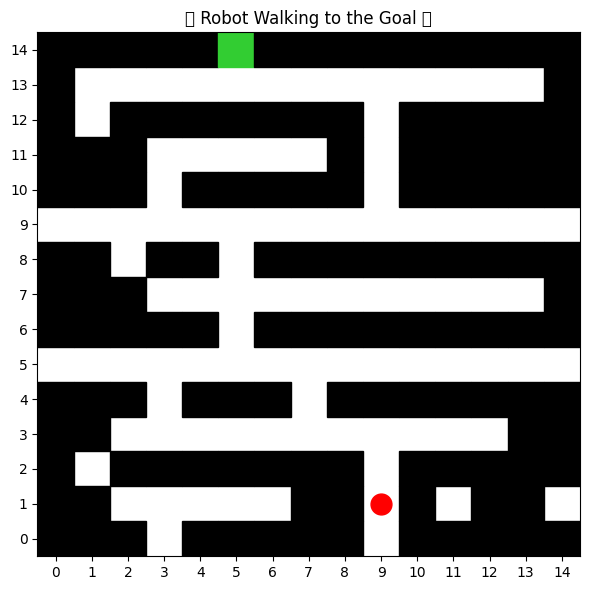

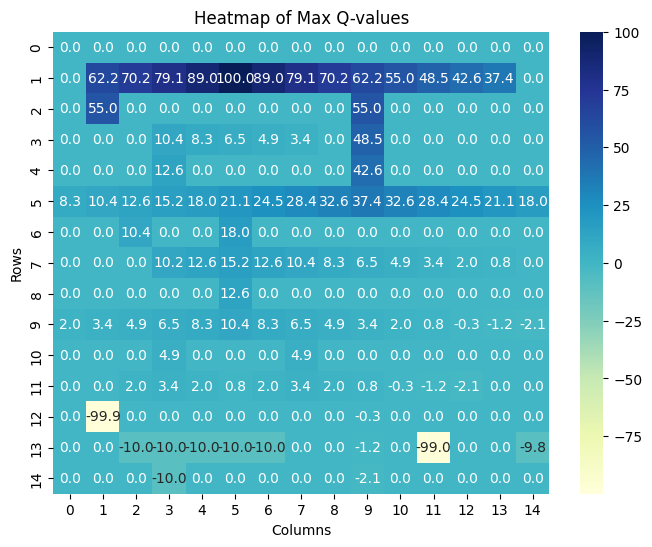

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import os

# Environment setup
rows, cols = 15, 15
actions = ['up', 'right', 'down', 'left']
aisles = {
    1: list(range(1, 14)),
    2: [1, 9],
    3: list(range(3, 8)) + [9],
    4: [3, 9],
    5: list(range(cols)),
    6: [2, 5],
    7: list(range(3, 14)),
    8: [5 ],
    9: list(range(cols)),
    10: [3,7],
    11: list(range(2, 13)),
    12: [1, 9],
    13: list(range(2, 7)) + [9,11, 14],
    14: [3, 9]
}

def create_rewards():
    rewards = np.full((rows, cols), -100.)
    rewards[0, 5] = 100.  # Goal
    for r in aisles:
        for c in aisles[r]:
            rewards[r, c] = -1.
    return rewards

def train_q_learning(rewards):
    q_values = np.zeros((rows, cols, len(actions)))
    epsilon = 0.9
    discount = 0.9
    learning_rate = 0.9
    episodes = 1000
    total_rewards_per_episode = []  # 🔥 Track total reward per episode

    def is_terminal_state(r, c):
        return rewards[r, c] != -1.

    def get_start_location():
        while True:
            r = np.random.randint(rows)
            c = np.random.randint(cols)
            if not is_terminal_state(r, c):
                return r, c

    def get_next_action(r, c, epsilon):
        if np.random.random() < epsilon:
            return np.argmax(q_values[r, c])
        return np.random.randint(len(actions))

    def get_next_location(r, c, action):
        if actions[action] == 'up' and r > 0:
            r -= 1
        elif actions[action] == 'right' and c < cols - 1:
            c += 1
        elif actions[action] == 'down' and r < rows - 1:
            r += 1
        elif actions[action] == 'left' and c > 0:
            c -= 1
        return r, c

    for episode in range(episodes):
        r, c = get_start_location()
        episode_reward = 0  # 🔥 Track reward for this episode
        steps = 0
        while not is_terminal_state(r, c):
            action = get_next_action(r, c, epsilon)
            old_r, old_c = r, c
            r, c = get_next_location(r, c, action)
            reward = rewards[r, c]
            episode_reward += reward  # 🔥 Accumulate reward
            old_q = q_values[old_r, old_c, action]
            best_future_q = np.max(q_values[r, c])
            q_values[old_r, old_c, action] = old_q + learning_rate * (reward + discount * best_future_q - old_q)
            steps += 1

        total_rewards_per_episode.append(episode_reward)  # 🔥 Save total reward

        # 🔥 Print some episodes' stats
        if episode % 100 == 0 or episode == episodes - 1:
            print(f"📘 Episode {episode+1}/{episodes}: Reward = {episode_reward}, Steps = {steps}")

    avg_reward = np.mean(total_rewards_per_episode)
    print(f"\n✅ Training Complete!")
    print(f"📊 Total Episodes: {episodes}")
    print(f"📈 Average Reward per Episode: {avg_reward:.2f}")
    print(f"🏁 Final Episode Reward: {total_rewards_per_episode[-1]}\n")

    save_path = os.path.join(os.getcwd(), 'q_values.npy')
    np.save(save_path, q_values)
    print(f"💾 Q-table saved to: {save_path}")

    return q_values


def get_shortest_path(start_row, start_col, q_values, rewards):
    def is_terminal_state(row, col):
        return rewards[row, col] != -1.

    def get_next_location(row, col, action_index):
        if actions[action_index] == 'up' and row > 0:
            row -= 1
        elif actions[action_index] == 'right' and col < cols - 1:
            col += 1
        elif actions[action_index] == 'down' and row < rows - 1:
            row += 1
        elif actions[action_index] == 'left' and col > 0:
            col -= 1
        return row, col

    if is_terminal_state(start_row, start_col):
        return []

    path = [[start_row, start_col]]
    row, col = start_row, start_col

    while not is_terminal_state(row, col):
        action_index = np.argmax(q_values[row, col])
        row, col = get_next_location(row, col, action_index)
        path.append([row, col])
        if len(path) > 100:
            break

    return path

def animate_path(path, rewards):
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_xlim(-0.5, cols - 0.5)
    ax.set_ylim(-0.5, rows - 0.5)
    ax.set_xticks(np.arange(cols))
    ax.set_yticks(np.arange(rows))
    # ax.grid(True)

    for row in range(rows):
        for col in range(cols):
            y = rows - row - 1
            if rewards[row, col] == -100.:
                ax.add_patch(plt.Rectangle((col - 0.5, y - 0.5), 1, 1, color='black'))
            elif rewards[row, col] == 100.:
                ax.add_patch(plt.Rectangle((col - 0.5, y - 0.5), 1, 1, color='limegreen'))

    robot, = ax.plot([], [], marker='o', color='red', markersize=15)
    trail, = ax.plot([], [], linestyle='--', color='blue', linewidth=2)
    trail_x, trail_y = [], []

    def update(frame):
        if frame < len(path):
            row, col = path[frame]
            y = rows - row - 1
            robot.set_data([col], [y])
            trail_x.append(col)
            trail_y.append(y)
            trail.set_data(trail_x, trail_y)
        return robot, trail

    ani = animation.FuncAnimation(fig, update, frames=len(path), interval=500, blit=True, repeat=False)
    plt.title("🤖 Robot Walking to the Goal 🚩")
    plt.tight_layout()
    plt.show()

from learning_process import plot_q_heatmap

# ===Main Execution===

if __name__ == "__main__":
    print("📂 Starting main.py...")
    rewards_matrix = create_rewards()
    q_table = train_q_learning(rewards_matrix)

    start_row, start_col = 13, 9
    path = get_shortest_path(start_row, start_col, q_table, rewards_matrix)

    if path:
        print(f"\n🚀 Path found from ({start_row},{start_col}): {path}")

        # Calculate total accumulated reward
        total_reward = 0
        for cell in path:
            total_reward += rewards_matrix[cell[0], cell[1]]

        print(f"🧮 Total Accumulated Reward : {total_reward}")
        print(f"🎯 Final Goal Cell Reward   : {rewards_matrix[path[-1][0], path[-1][1]]}")
        print(f"✅ Training & Path Execution Successful!\n")

        animate_path(path, rewards_matrix)
        plot_q_heatmap(q_table) 
    else:
        print("⚠️ No path found or starting at a terminal state.")